In [370]:
import pandas as pd
import numpy as np
import io
import json
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)
        
url = 'https://raw.githubusercontent.com/neha0812/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'

df = pd.read_csv(url, error_bad_lines=False)
 

In [371]:
df = df[df.COMM_CODE != 'SVO']
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.reset_index()

,index,Unnamed: 0,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,...,own3,own4,lab1,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm,comm_polulation
0,0,0,4 saddlemead rd ne,343500.0,re,residential,sad,saddle ridge,51.126750,-113.944255,...,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0,"12,854"
1,1,1,4 saddlemead rd ne,345500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,...,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0,"12,854"
2,2,2,4 saddlemead rd ne,323500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,...,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0,"12,854"
3,3,3,4 saddlemead rd ne,315500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,...,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0,"12,854"
4,4,4,70 saddleback rd ne,393500.0,re,residential,sad,saddle ridge,51.128776,-113.948802,...,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0,"12,854"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,15994,15994,40 cranfield pl se,524000.0,re,residential,cra,cranston,50.890842,-113.977871,...,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0,"10,088"
15062,15995,15995,40 cranfield pl se,493000.0,re,residential,cra,cranston,50.890842,-113.977871,...,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0,"10,088"
15063,15997,15997,167 cranwell cl se,644000.0,re,residential,cra,cranston,50.890260,-113.985099,...,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0,"10,088"
15064,15998,15998,167 cranwell cl se,679000.0,re,residential,cra,cranston,50.890260,-113.985099,...,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0,"10,088"


In [372]:
X = df[['YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4', 'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2',
       'pop3', 'pop4', 'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3',
       'inc4', 'own1', 'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3','vacancy_rate']]
y = df['pct_change']

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature: 0, Score: -0.00300
Feature: 1, Score: -0.01385
Feature: 2, Score: 0.00793
Feature: 3, Score: -0.00270
Feature: 4, Score: 0.00539
Feature: 5, Score: -0.00668
Feature: 6, Score: 0.00640
Feature: 7, Score: 0.01156
Feature: 8, Score: 0.01614
Feature: 9, Score: 0.01461
Feature: 10, Score: -0.01293
Feature: 11, Score: 0.00227
Feature: 12, Score: 0.11520
Feature: 13, Score: 0.12135
Feature: 14, Score: -0.00064
Feature: 15, Score: 0.03568
Feature: 16, Score: 0.02580
Feature: 17, Score: -0.00166
Feature: 18, Score: -0.00289
Feature: 19, Score: 0.00681
Feature: 20, Score: 0.00139
Feature: 21, Score: -0.00095
Feature: 22, Score: 0.00750
Feature: 23, Score: -0.00571
Feature: 24, Score: -0.00198
Feature: 25, Score: 0.00824
Feature: 26, Score: -0.00360
Feature: 27, Score: 0.02186
Feature: 28, Score: -0.00109


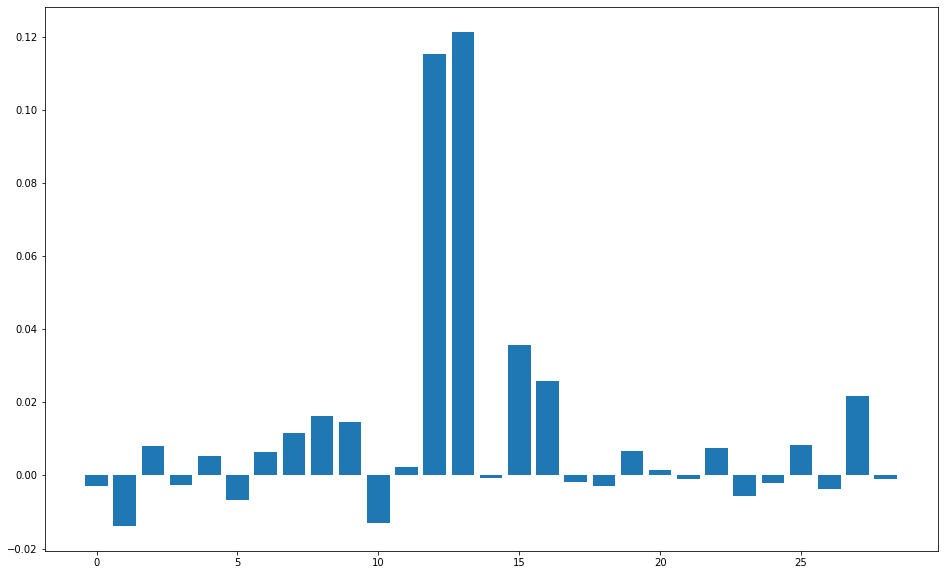

In [374]:
model1 = LinearRegression()

model1.fit(X_train, y_train)

importance1 = model1.coef_

for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

Feature: 0, Score: 0.29986
Feature: 1, Score: 0.00168
Feature: 2, Score: 0.00578
Feature: 3, Score: 0.05682
Feature: 4, Score: 0.20350
Feature: 5, Score: 0.04202
Feature: 6, Score: 0.00340
Feature: 7, Score: 0.00065
Feature: 8, Score: 0.20223
Feature: 9, Score: 0.00191
Feature: 10, Score: 0.01314
Feature: 11, Score: 0.00240
Feature: 12, Score: 0.00176
Feature: 13, Score: 0.00271
Feature: 14, Score: 0.00151
Feature: 15, Score: 0.00442
Feature: 16, Score: 0.00223
Feature: 17, Score: 0.01197
Feature: 18, Score: 0.01173
Feature: 19, Score: 0.00392
Feature: 20, Score: 0.00419
Feature: 21, Score: 0.02168
Feature: 22, Score: 0.00873
Feature: 23, Score: 0.00352
Feature: 24, Score: 0.00341
Feature: 25, Score: 0.00449
Feature: 26, Score: 0.00325
Feature: 27, Score: 0.00192
Feature: 28, Score: 0.07517


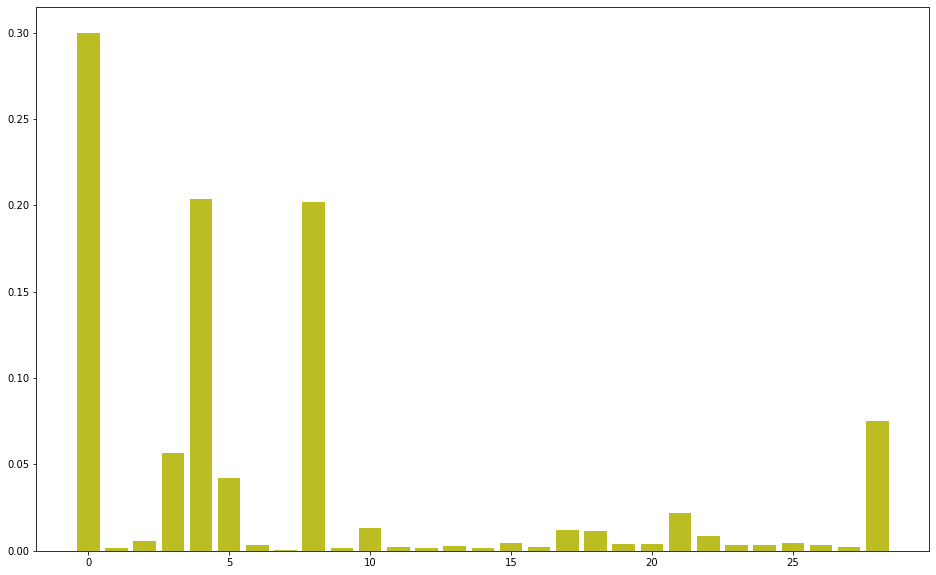

In [375]:
model2 = DecisionTreeRegressor()

model2.fit(X_train, y_train)

importance2 = model2.feature_importances_

for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))

    plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

Feature: 0, Score: 0.32991
Feature: 1, Score: 0.03706
Feature: 2, Score: 0.03692
Feature: 3, Score: 0.02660
Feature: 4, Score: 0.05335
Feature: 5, Score: 0.03046
Feature: 6, Score: 0.03256
Feature: 7, Score: 0.10559
Feature: 8, Score: 0.11362
Feature: 9, Score: 0.00283
Feature: 10, Score: 0.00413
Feature: 11, Score: 0.00388
Feature: 12, Score: 0.00870
Feature: 13, Score: 0.00435
Feature: 14, Score: 0.00698
Feature: 15, Score: 0.00620
Feature: 16, Score: 0.00618
Feature: 17, Score: 0.01608
Feature: 18, Score: 0.01356
Feature: 19, Score: 0.00460
Feature: 20, Score: 0.00786
Feature: 21, Score: 0.00780
Feature: 22, Score: 0.00951
Feature: 23, Score: 0.00825
Feature: 24, Score: 0.00595
Feature: 25, Score: 0.00758
Feature: 26, Score: 0.00905
Feature: 27, Score: 0.00524
Feature: 28, Score: 0.09520


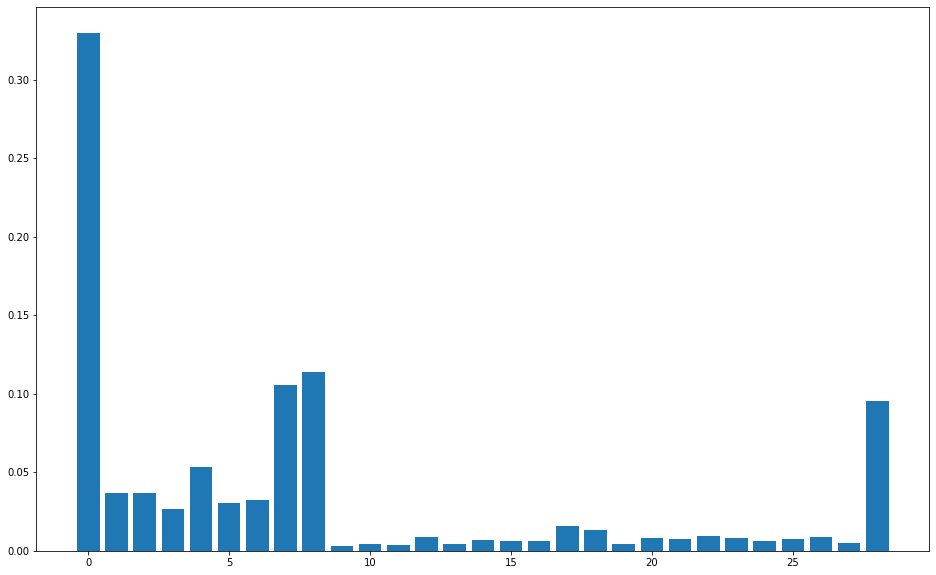

In [376]:
model3 = RandomForestRegressor()

model3.fit(X_train, y_train)

importance3 = model3.feature_importances_

for i,v in enumerate(importance3):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance3))], importance3)
plt.show()

Feature: 0, Score: 0.02523
Feature: 1, Score: 0.08061
Feature: 2, Score: 0.01085
Feature: 3, Score: 0.03346
Feature: 4, Score: 0.01271
Feature: 5, Score: 0.01718
Feature: 6, Score: 0.00896
Feature: 7, Score: 0.26520
Feature: 8, Score: 0.02251
Feature: 9, Score: 0.01645
Feature: 10, Score: 0.01766
Feature: 11, Score: 0.00340
Feature: 12, Score: 0.02827
Feature: 13, Score: 0.01452
Feature: 14, Score: 0.01290
Feature: 15, Score: 0.05256
Feature: 16, Score: 0.01576
Feature: 17, Score: 0.02757
Feature: 18, Score: 0.03151
Feature: 19, Score: 0.01263
Feature: 20, Score: 0.11211
Feature: 21, Score: 0.01648
Feature: 22, Score: 0.02598
Feature: 23, Score: 0.02047
Feature: 24, Score: 0.04877
Feature: 25, Score: 0.02556
Feature: 26, Score: 0.00670
Feature: 27, Score: 0.02371
Feature: 28, Score: 0.01028


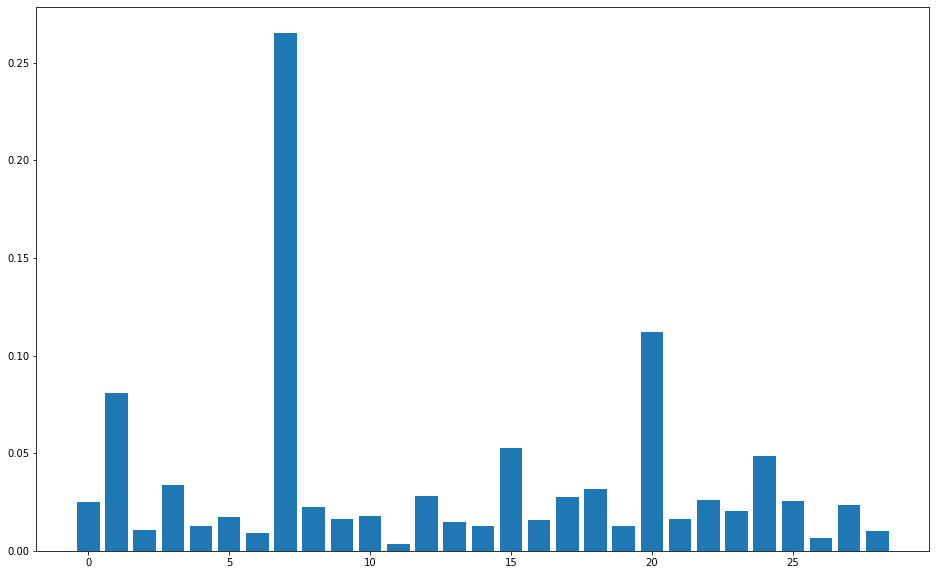

In [377]:
model4 = XGBRegressor()

model4.fit(X_train, y_train)

importance4 = model4.feature_importances_
for i,v in enumerate(importance4):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance4))], importance4)
plt.show()